# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [16]:
sinasc1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc1.groupby('munResNome').agg({
    'IDADEMAE':[('Média mãe','mean')],    
    'IDADEPAI':[('Média pai', 'mean')],    
})


,IDADEMAE,IDADEPAI
,Média mãe,Média pai
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [59]:
sinasc2 = sinasc_raw[['PESO', 'SEXO', 'DTNASC', 'ESCMAE']]
sinasc2.groupby(['DTNASC', 'SEXO','ESCMAE'])['PESO'].mean()

DTNASC      SEXO       ESCMAE         
2019-01-01  Feminino   12 anos ou mais    3370.000000
                       4 a 7 anos         3536.250000
                       8 a 11 anos        3193.928571
            Masculino  1 a 3 anos         2835.000000
                       12 anos ou mais    2857.500000
                                             ...     
2019-12-31  Feminino   8 a 11 anos        3418.500000
            Masculino  1 a 3 anos         2895.000000
                       12 anos ou mais    3348.333333
                       4 a 7 anos         3511.888889
                       8 a 11 anos        3354.166667
Name: PESO, Length: 2586, dtype: float64

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [141]:
sinasc3 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
agg_mun = sinasc3.groupby('munResNome').agg({
    'munResNome':[('Qtd. Nasc','count')],
    'IDADEMAE':[('Média','mean'), ('Máximo','max'), ('Mínimo','min')],
    'IDADEPAI':[('Média','mean'), ('Máximo','max'), ('Mínimo','min')]
})

agg_mun = agg_mun.sort_values(('munResNome', 'Qtd. Nasc'), ascending=True)

In [143]:
agg_mun

munResNome   IDADEMAE                 IDADEPAI  \
                           Qtd. Nasc      Média Máximo Mínimo      Média   
munResNome                                                                 
Município ignorado - RO            1  24.000000     24     24  22.000000   
Castanheiras                      32  27.281250     39     17  30.392857   
Pimenteiras do Oeste              40  25.075000     40     14  35.600000   
Primavera de Rondônia             43  27.023256     39     16  31.888889   
Parecis                           44  26.454545     41     16  32.473684   
Rio Crespo                        50  26.660000     39     16  28.000000   
São Felipe D'Oeste                54  26.481481     41     17  31.395833   
Teixeirópolis                     64  26.031250     39     16  31.500000   
Cacaulândia                       75  25.546667     42     16  36.333333   
Cabixi                            80  26.037500     39     13  34.333333   
Vale do Paraíso                   81  25.679012     52     14  29.976744   
Ministro Andreazza                84  27.904762     44     17  33.849315   
Vale do Anari                     93  26.096774     44     14  34.000000   
Theobroma                         97  25.536082     42     15  30.083333   
Novo Horizonte do Oeste           98  26.938776     41     15  31.588235   
Santa Luzia D'Oeste               99  26.121212     41     15  30.703297   
Nova União                       104  26.894231     39     16  31.371429   
Itapuã do Oeste                  109  26.064220     46     15  42.500000   
Governador Jorge Teixeira        112  24.401786     41     13  29.222222   
Corumbiara                       127  24.716535     43     15  32.470588   
Alto Alegre dos Parecis          154  24.844156     41     14  29.179104   
Chupinguaia                      162  25.333333     42     13  29.629630   
Mirante da Serra                 164  26.304878     46     14  32.154762   
Campo Novo de Rondônia           166  24.825301     40     13  30.500000   
Seringueiras                     168  24.910714     42     14  30.500000   
Urupá                            170  26.688235     43     15  31.008929   
Monte Negro                      199  25.648241     40     14  34.678571   
Cujubim                          205  24.482927     42     14  31.400000   
Alvorada D'Oeste                 205  25.770732     44     15  30.757282   
Colorado do Oeste                214  27.602804     47     15  34.354839   
Alto Paraíso                     226  24.960177     42     11  28.833333   
Costa Marques                    233  24.412017     41     12  30.613636   
Cerejeiras                       237  27.240506     53     15  31.652778   
Nova Brasilândia D'Oeste         261  26.222222     51     15  30.520833   
São Francisco do Guaporé         303  25.660066     41     14  31.638889   
Presidente Médici                304  25.796053     44     14  30.150754   
Candeias do Jamari               337  25.243323     45     14  29.894737   
São Miguel do Guaporé            353  25.926346     42     14  32.666667   
Alta Floresta D'Oeste            367  25.991826     53     14  29.548701   
Nova Mamoré                      432  25.326389     46     14  31.692308   
Espigão D'Oeste                  450  26.093333     44     14  31.198113   
Machadinho D'Oeste               500  25.480000     44     13  31.326923   
Buritis                          583  25.559177     44     14  30.812500   
Pimenta Bueno                    616  25.199675     47     13  29.745174   
Ouro Preto do Oeste              631  26.375594     44     14  31.233244   
Guajará-Mirim                    781  25.462228     43     13  30.470588   
Jaru                             881  25.982974     45     12  32.197183   
Rolim de Moura                   927  26.600863     44     14  30.360479   
Cacoal                          1374  26.890102     47     14  30.931854   
Vilhena                         1590  26.433962     46     14  34.152941  

R = Castanheiras

In [149]:
agg_mun.loc['Castanheiras']

munResNome  Qtd. Nasc    32.000000
IDADEMAE    Média        27.281250
            Máximo       39.000000
            Mínimo       17.000000
IDADEPAI    Média        30.392857
            Máximo       43.000000
            Mínimo       17.000000
Name: Castanheiras, dtype: float64

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [151]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [153]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [155]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [277]:
sinasc4 = sinasc_raw[['munResNome', 'DTNASC', 'QTDFILVIVO', 'IDADEMAE', 'IDADEPAI']]
sinasc4.loc[:, 'DTNASC'] = pd.to_datetime(sinasc4['DTNASC'])
sinasc4 = sinasc4.infer_objects()
sinasc4.set_index('DTNASC', inplace=True)

In [279]:
sinasc_agg = sinasc4.groupby('munResNome').resample('ME').agg({
    'QTDFILVIVO':['sum', 'max', 'min'],
    'IDADEMAE': ['mean', 'max', 'min'],
    'IDADEPAI': ['mean', 'max', 'min'],
})
sinasc_agg

QTDFILVIVO              IDADEMAE              \
                                        sum   max  min       mean   max   min   
munResNome            DTNASC                                                    
Alta Floresta D'Oeste 2019-01-31       40.0   4.0  0.0  25.800000  36.0  17.0   
                      2019-02-28       15.0   3.0  0.0  24.080000  39.0  16.0   
                      2019-03-31       28.0   4.0  0.0  26.193548  35.0  18.0   
                      2019-04-30       26.0   3.0  0.0  25.189189  39.0  17.0   
                      2019-05-31       22.0   4.0  0.0  24.833333  40.0  14.0   
...                                     ...   ...  ...        ...   ...   ...   
Vilhena               2019-08-31       93.0   6.0  0.0  26.363636  44.0  14.0   
                      2019-09-30      119.0  10.0  0.0  26.688525  41.0  15.0   
                      2019-10-31      128.0   5.0  0.0  25.964789  43.0  14.0   
                      2019-11-30      111.0   5.0  0.0  26.113636  46.0  14.0   
                      2019-12-31      123.0   8.0  0.0  27.147541  42.0  15.0   

                                   IDADEPAI              
                                       mean   max   min  
munResNome            DTNASC                             
Alta Floresta D'Oeste 2019-01-31  29.500000  43.0  21.0  
                      2019-02-28  27.478261  39.0  17.0  
                      2019-03-31  30.125000  45.0  20.0  
                      2019-04-30  27.551724  43.0  19.0  
                      2019-05-31  29.269231  46.0  19.0  
...                                     ...   ...   ...  
Vilhena               2019-08-31  31.533333  40.0  18.0  
                      2019-09-30  35.200000  51.0  23.0  
                      2019-10-31  36.687500  60.0  27.0  
                      2019-11-30  33.076923  46.0  23.0  
                      2019-12-31  34.400000  48.0  24.0  

[625 rows x 9 columns]

In [281]:
mun_marco = sinasc_agg[(sinasc_agg.index.get_level_values(1).month == 3)]
mun_marco

QTDFILVIVO             IDADEMAE        \
                                            sum  max  min       mean   max   
munResNome                DTNASC                                             
Alta Floresta D'Oeste     2019-03-31       28.0  4.0  0.0  26.193548  35.0   
Alto Alegre dos Parecis   2019-03-31        8.0  2.0  0.0  25.100000  36.0   
Alto Paraíso              2019-03-31       27.0  3.0  0.0  24.818182  41.0   
Alvorada D'Oeste          2019-03-31       20.0  3.0  0.0  25.772727  36.0   
Ariquemes                 2019-03-31      148.0  4.0  0.0  25.304965  42.0   
Buritis                   2019-03-31       54.0  4.0  0.0  25.406780  42.0   
Cabixi                    2019-03-31        5.0  3.0  0.0  28.000000  36.0   
Cacaulândia               2019-03-31       12.0  4.0  0.0  26.200000  32.0   
Cacoal                    2019-03-31      128.0  7.0  0.0  26.466165  40.0   
Campo Novo de Rondônia    2019-03-31        9.0  2.0  0.0  22.153846  35.0   
Candeias do Jamari        2019-03-31       35.0  4.0  0.0  24.363636  40.0   
Castanheiras              2019-03-31        7.0  3.0  1.0  30.500000  35.0   
Cerejeiras                2019-03-31       14.0  2.0  0.0  27.062500  33.0   
Chupinguaia               2019-03-31       19.0  4.0  0.0  26.277778  42.0   
Colorado do Oeste         2019-03-31       19.0  4.0  0.0  27.736842  39.0   
Corumbiara                2019-03-31       10.0  3.0  0.0  24.083333  37.0   
Costa Marques             2019-03-31       29.0  4.0  0.0  25.666667  36.0   
Cujubim                   2019-03-31       22.0  5.0  0.0  24.882353  40.0   
Espigão D'Oeste           2019-03-31       61.0  6.0  0.0  25.409091  43.0   
Governador Jorge Teixeira 2019-03-31        5.0  2.0  0.0  24.500000  33.0   
Guajará-Mirim             2019-03-31      112.0  8.0  0.0  26.333333  43.0   
Itapuã do Oeste           2019-03-31        9.0  3.0  0.0  25.625000  39.0   
Jaru                      2019-03-31       80.0  5.0  0.0  26.550000  40.0   
Ji-Paraná                 2019-03-31      155.0  4.0  0.0  25.377660  44.0   
Machadinho D'Oeste        2019-03-31       44.0  6.0  0.0  26.295455  43.0   
Ministro Andreazza        2019-03-31        7.0  3.0  0.0  27.166667  35.0   
Mirante da Serra          2019-03-31        9.0  2.0  0.0  24.888889  37.0   
Monte Negro               2019-03-31       14.0  3.0  0.0  25.650000  36.0   
Nova Brasilândia D'Oeste  2019-03-31       18.0  3.0  0.0  26.650000  35.0   
Nova Mamoré               2019-03-31       68.0  6.0  0.0  24.207547  42.0   
Nova União                2019-03-31        4.0  1.0  0.0  23.428571  38.0   
Novo Horizonte do Oeste   2019-03-31        6.0  2.0  1.0  29.000000  37.0   
Ouro Preto do Oeste       2019-03-31       68.0  5.0  0.0  25.522388  44.0   
Parecis                   2019-03-31       11.0  5.0  1.0  28.000000  37.0   
Pimenta Bueno             2019-03-31       51.0  4.0  0.0  25.177419  39.0   
Pimenteiras do Oeste      2019-03-31        6.0  2.0  0.0  23.000000  29.0   
Porto Velho               2019-03-31      812.0  9.0  0.0  26.596774  44.0   
Presidente Médici         2019-03-31       21.0  3.0  0.0  25.344828  38.0   
Primavera de Rondônia     2019-03-31        6.0  2.0  0.0  26.800000  33.0   
Rio Crespo                2019-03-31        9.0  3.0  0.0  28.888889  37.0   
Rolim de Moura            2019-03-31       50.0  5.0  0.0  27.594203  41.0   
Santa Luzia D'Oeste       2019-03-31        3.0  2.0  0.0  23.285714  27.0   
Seringueiras              2019-03-31       19.0  2.0  0.0  25.473684  39.0   
São Felipe D'Oeste        2019-03-31        0.0  0.0  0.0  23.600000  31.0   
São Francisco do Guaporé  2019-03-31       36.0  6.0  0.0  25.677419  35.0   
São Miguel do Guaporé     2019-03-31       40.0  4.0  0.0  26.365854  42.0   
Teixeirópolis             2019-03-31        1.0  1.0  0.0  26.666667  32.0   
Theobroma                 2019-03-31        9.0  2.0  0.0  26.875000  35.0   
Urupá                     2019-03-31       13.0  2.0  0.0  

In [283]:
mun_marco.sort_values(('QTDFILVIVO', 'sum'), ascending=False)

QTDFILVIVO             IDADEMAE        \
                                            sum  max  min       mean   max   
munResNome                DTNASC                                             
Porto Velho               2019-03-31      812.0  9.0  0.0  26.596774  44.0   
Ji-Paraná                 2019-03-31      155.0  4.0  0.0  25.377660  44.0   
Ariquemes                 2019-03-31      148.0  4.0  0.0  25.304965  42.0   
Vilhena                   2019-03-31      144.0  5.0  0.0  26.412162  39.0   
Cacoal                    2019-03-31      128.0  7.0  0.0  26.466165  40.0   
Guajará-Mirim             2019-03-31      112.0  8.0  0.0  26.333333  43.0   
Jaru                      2019-03-31       80.0  5.0  0.0  26.550000  40.0   
Ouro Preto do Oeste       2019-03-31       68.0  5.0  0.0  25.522388  44.0   
Nova Mamoré               2019-03-31       68.0  6.0  0.0  24.207547  42.0   
Espigão D'Oeste           2019-03-31       61.0  6.0  0.0  25.409091  43.0   
Buritis                   2019-03-31       54.0  4.0  0.0  25.406780  42.0   
Pimenta Bueno             2019-03-31       51.0  4.0  0.0  25.177419  39.0   
Rolim de Moura            2019-03-31       50.0  5.0  0.0  27.594203  41.0   
Machadinho D'Oeste        2019-03-31       44.0  6.0  0.0  26.295455  43.0   
São Miguel do Guaporé     2019-03-31       40.0  4.0  0.0  26.365854  42.0   
São Francisco do Guaporé  2019-03-31       36.0  6.0  0.0  25.677419  35.0   
Candeias do Jamari        2019-03-31       35.0  4.0  0.0  24.363636  40.0   
Costa Marques             2019-03-31       29.0  4.0  0.0  25.666667  36.0   
Alta Floresta D'Oeste     2019-03-31       28.0  4.0  0.0  26.193548  35.0   
Alto Paraíso              2019-03-31       27.0  3.0  0.0  24.818182  41.0   
Cujubim                   2019-03-31       22.0  5.0  0.0  24.882353  40.0   
Presidente Médici         2019-03-31       21.0  3.0  0.0  25.344828  38.0   
Alvorada D'Oeste          2019-03-31       20.0  3.0  0.0  25.772727  36.0   
Seringueiras              2019-03-31       19.0  2.0  0.0  25.473684  39.0   
Colorado do Oeste         2019-03-31       19.0  4.0  0.0  27.736842  39.0   
Chupinguaia               2019-03-31       19.0  4.0  0.0  26.277778  42.0   
Nova Brasilândia D'Oeste  2019-03-31       18.0  3.0  0.0  26.650000  35.0   
Monte Negro               2019-03-31       14.0  3.0  0.0  25.650000  36.0   
Cerejeiras                2019-03-31       14.0  2.0  0.0  27.062500  33.0   
Urupá                     2019-03-31       13.0  2.0  0.0  26.357143  38.0   
Cacaulândia               2019-03-31       12.0  4.0  0.0  26.200000  32.0   
Parecis                   2019-03-31       11.0  5.0  1.0  28.000000  37.0   
Corumbiara                2019-03-31       10.0  3.0  0.0  24.083333  37.0   
Theobroma                 2019-03-31        9.0  2.0  0.0  26.875000  35.0   
Rio Crespo                2019-03-31        9.0  3.0  0.0  28.888889  37.0   
Mirante da Serra          2019-03-31        9.0  2.0  0.0  24.888889  37.0   
Campo Novo de Rondônia    2019-03-31        9.0  2.0  0.0  22.153846  35.0   
Itapuã do Oeste           2019-03-31        9.0  3.0  0.0  25.625000  39.0   
Vale do Anari             2019-03-31        9.0  2.0  0.0  24.545455  34.0   
Alto Alegre dos Parecis   2019-03-31        8.0  2.0  0.0  25.100000  36.0   
Castanheiras              2019-03-31        7.0  3.0  1.0  30.500000  35.0   
Vale do Paraíso           2019-03-31        7.0  2.0  0.0  23.615385  33.0   
Ministro Andreazza        2019-03-31        7.0  3.0  0.0  27.166667  35.0   
Pimenteiras do Oeste      2019-03-31        6.0  2.0  0.0  23.000000  29.0   
Primavera de Rondônia     2019-03-31        6.0  2.0  0.0  26.800000  33.0   
Novo Horizonte do Oeste   2019-03-31        6.0  2.0  1.0  29.000000  37.0   
Cabixi                    2019-03-31        5.0  3.0  0.0  28.000000  36.0   
Governador Jorge Teixeira 2019-03-31        5.0  2.0  0.0  24.500000  33.0   
Nova União                2019-03-31        4.0  1.0  0.0  

R = Porto Velho

In [286]:
mun_marco.loc['Porto Velho']

QTDFILVIVO             IDADEMAE               IDADEPAI            
                  sum  max  min       mean   max   min       mean   max   min
DTNASC                                                                       
2019-03-31      812.0  9.0  0.0  26.596774  44.0  14.0  34.629032  62.0  19.0

### insight
- Existe um *outlier*, na qual, a quantidade de bebês vivos está muito fora do comum, para determinado dia.
- Se esse dado for real, houve algum evento para que tantos bebês possam ter nascido nesse dia.
- Se esse dado for real, pode ter ocorrido uma crise  nos hospitais.
- Pode ter 

<Axes: xlabel='munResNome,DTNASC'>

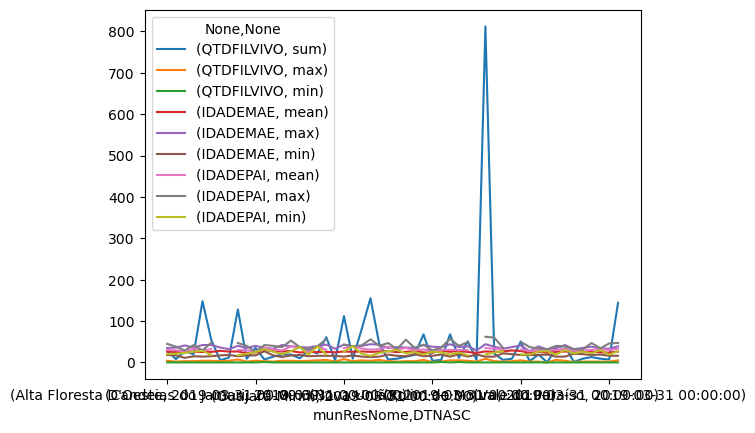

In [295]:
mun_marco.plot()